In [ ]:
1. Import pandas libraries

In [1]:
import numpy as np
from numpy import median
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
2. Formatting pandas output

In [2]:
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 200

In [ ]:
3. Loading data from online github file

In [3]:
# read dataset into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/chuludata/AirbnbNewYorkOpenDataset/main/AB_NYC_2019.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
4. Data profiling

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","38,843.00","48,895.00","48,895.00"
mean,"19,017,143.24","67,620,010.65",40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,"10,983,108.39","78,610,967.03",0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,"2,539.00","2,438.00",40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,"9,471,945.00","7,822,033.00",40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,"19,677,284.00","30,793,816.00",40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,"29,152,178.50","107,434,423.00",40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,"36,487,245.00","274,321,313.00",40.91,-73.71,"10,000.00","1,250.00",629.00,58.50,327.00,365.00


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
5. EDA Exploratory Data Analysis

5.1. What are the top 3 districts that have biggest number of renting?
Answer: the top 3 districts that have biggest number of renting are Manhattan, Brooklyn, Queens.
Pandas Tool used: Bar chart is used to identify the top 3 districts that have biggest number of renting.

<AxesSubplot:>

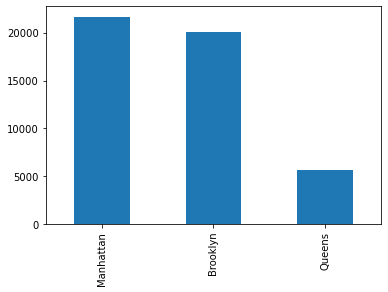

In [9]:
df['neighbourhood_group'].value_counts(sort=True).nlargest(3).plot.bar()

In [ ]:
5.2. What is the top 1 room type in renting?
Answer: the top 1 room type in renting is 'Entire home/apt'.
Pandas Tool used: Pie chart is used to identify the top 1 room type in renting.

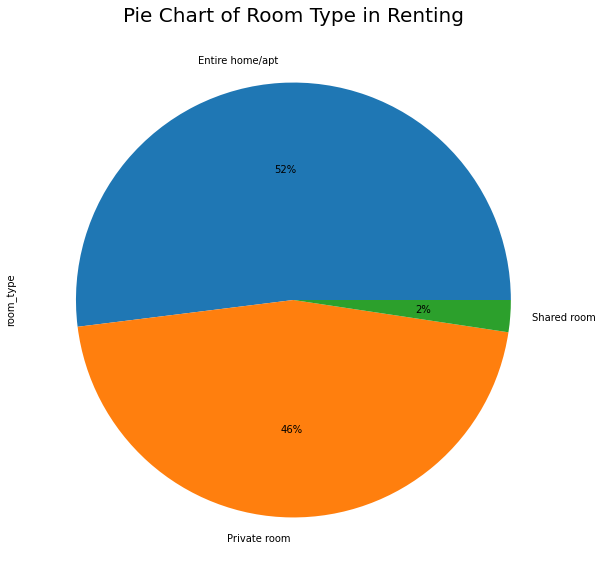

In [10]:
df['room_type'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(15,10))

plt.title("Pie Chart of Room Type in Renting", size=20)

plt.show()

In [ ]:
5.3 What is the count of renting in each district and subgrouped by room type?
Answer: The bar chart with two variables (district and room_type) is drawn below. Draw the bar chart to show the count of renting in each district and subgrouped by room type.
Pandas Tool used: Seaborn Countplot with Two Variables using Hue. The function countplot is called with 'x' (the big-group variable, 'neighbourhood_group' in this example) and 'hue' parameter (the sub-group variable, 'room_type' in this example).

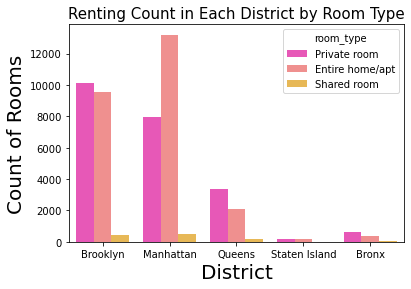

In [11]:
sns.countplot(x='neighbourhood_group', hue='room_type', data=df,  palette="spring")

plt.title('Renting Count in Each District by Room Type', size=15)
plt.ylabel('Count of Rooms', size=20)
plt.xlabel('District', size=20)

plt.show()

In [ ]:
5.4 What is the price of renting in each district and subgrouped by room type?
Answer: The two bar charts is drawn below. Draw the two bar charts side by side to show the price of renting in each district and subgrouped by room type.
Pandas Tool used: Two charts are drawn with plt.subplots. Seaborn barplot with Two Variables using Hue.
The function barplot is called with 'x' (the big-group variable, 'neighbourhood_group' in this example) and 'hue' parameter (the sub-group variable, 'room_type' in this example). y value is using 'price'.
The second barplot uses estimator=median to show the median value.

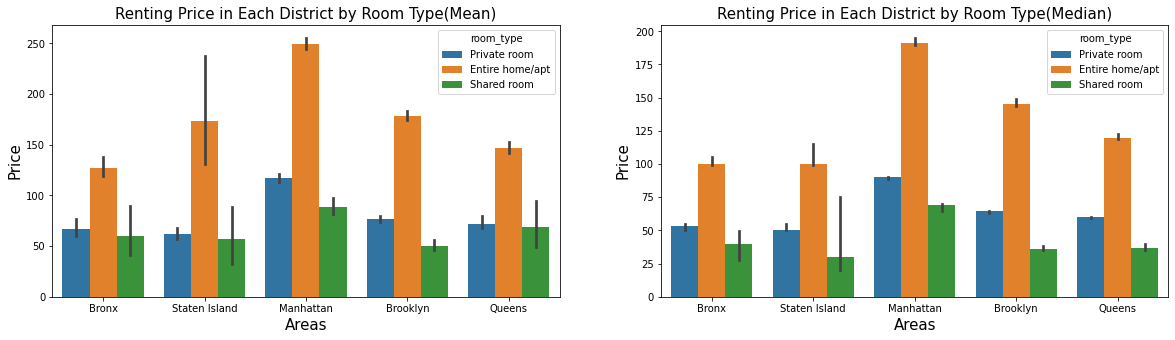

In [21]:
order = ['Bronx', 'Staten Island', 'Manhattan', 'Brooklyn','Queens']

fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(data=df, y='price', x='neighbourhood_group',ax=ax[0], hue='room_type' ,order=order)
ax[0].set_title('Renting Price in Each District by Room Type(Mean)', size=15)
ax[0].set_xlabel('Areas', size=15)
ax[0].set_ylabel('Price', size=15)

sns.barplot(data=df, y='price', x='neighbourhood_group',ax=ax[1], hue='room_type' ,order=order, estimator=median)
ax[1].set_title('Renting Price in Each District by Room Type(Median)', size=15)
ax[1].set_xlabel('Areas', size=15)
ax[1].set_ylabel("Price", size=15)


plt.show()

In [ ]:
5.5 What are the 10 highest price neighborhood in New York?
Answer: The bar chart to show the 10 highest price neighborhood is drawn below.
Pandas Tool used: The 10 highest price neighborhood is save in variable 'high_10_price'. sns.barplot is used to draw the bar chart for variable 'high_10_price'.
Documentation for subplots
Documentation for barplot
plt.subplots returns two values, we save these two values in (fig, ax).

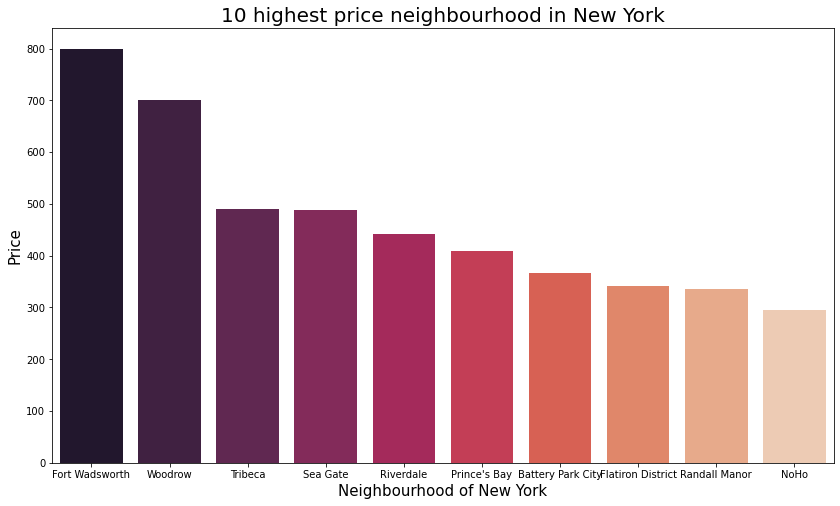

In [28]:
# The 10 highest grice neighborhood is save in variable 'high_5_price'
high_10_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

# Draw the bar chart
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(data=df, y=high_10_price, x=high_10_price.index, palette="rocket")

plt.title("10 highest price neighbourhood in New York", size=20)
plt.xlabel("Neighbourhood of New York", size=15)
plt.ylabel("Price", size=15)

plt.show()

In [ ]:
5.6 What are the 10 highest price neighborhood of Manhattan?
Answer: The bar chart to show the 10 highest price neighborhood of Manhattan is drawn below.
Pandas Tool used: The sub dataframe of Manhattan data is saved in variable 'df_manhattan'. The 10 highest price neighborhood of Manhattan is save in variable 'high_10_price_manhattan'. sns.barplot is used to draw the bar chart for variable 'high_10_price_manhattan'.

In [18]:
df_manhattan = df[df['neighbourhood_group'] == "Manhattan"]
high_10_price_manhattan = df_manhattan.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
high_10_price_manhattan

neighbourhood
Tribeca             490.64
Battery Park City   367.56
Flatiron District   341.93
NoHo                295.72
SoHo                287.10
Midtown             282.72
West Village        267.68
Greenwich Village   263.41
Chelsea             249.74
Theater District    248.01
Name: price, dtype: float64

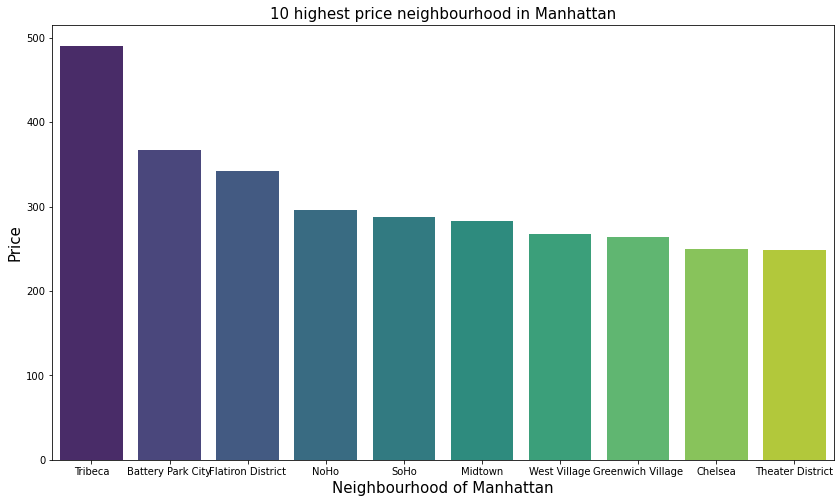

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=df_manhattan, y=high_10_price_manhattan, x=high_10_price_manhattan.index, palette="viridis")

plt.title("10 highest price neighbourhood in Manhattan", size=15)
plt.ylabel("Price", size=15)
plt.xlabel("Neighbourhood of Manhattan", size=15)

plt.show()